# Example 4 - using xcube with a geographic data base

This notebook shows how to access different data sets through the Sentinel Hub API:

1. Query geoDB to retrieve vector data set
2. Rasterize vector data
3. Relate vector data and gridded data retrieved through Sentinel Hub

To run this Notebook, make sure the SENTINEL Hub / xcube Integration is setup correctly, see [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb).

In [80]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
import numpy as np

In [84]:
x1 = 14.2  # degree
y1 = 44.75  # degree
x2 = 14.75  # degree
y2 = 45.25  # degree

bbox = x1, y1, x2, y2

In [85]:
spatial_res = 0.00018   # = 20.038 meters in degree

In [86]:
SH = SentinelHub()
SH.dataset_names

['S2L1C', 'S1GRD', 'CUSTOM', 'DEM', 'S2L2A']

## Sentinel-2 L2A

In [87]:
SH.band_names('S2L2A')

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B11',
 'B12',
 'SCL',
 'SNW',
 'CLD',
 'viewZenithMean',
 'viewAzimuthMean',
 'sunZenithAngles',
 'sunAzimuthAngles',
 'AOT']

In [93]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['B04'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_tolerance='30M')  

In [94]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 3072, lon: 3072, time: 31)
Coordinates:
  * lat        (lat) float64 45.3 45.3 45.3 45.3 ... 44.75 44.75 44.75 44.75
  * lon        (lon) float64 14.2 14.2 14.2 14.2 ... 14.75 14.75 14.75 14.75
  * time       (time) datetime64[ns] 2019-05-16T10:08:22 ... 2019-07-30T10:08:18
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.store.SentinelHubStore', ...
    date_created:            2019-11-12T15:33:01.756443
    processing_level:        L2A
    time_coverage_start:     2019-05-16T10:08:15+00:00
    time_coverage_end:       2019-07-30T10:08:25+00:00
    time_coverage_duration:  P75DT0H0M10S
    geospatial_lon_m

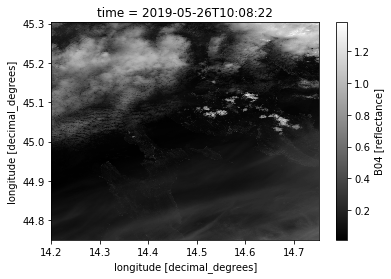

In [97]:
cube.B04.isel(time=4).plot.imshow(cmap='gray')